# Verkefni 1

Davíð Helgason  (dah38@hi.is)

Hieu

Hreiðar

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage # notum þetta fyrir myndir

import datetime # Notað til að mæla tímamismun.
import kmeans # Staðbundin skrá, fyrir k-means
import math # Stærðfræði
import glob # Notað til að finna skrár.

# Allt draslið er hér!
from prog import *

Hugtök
* centroid = þungamiðja, þyngdarpunktur, miðpunktur
* label = merki

Gögnin

## Fyrri hluti

Gögnin

In [2]:
albums = [load_image_as_arr(path) for path in glob.glob('albums/*.jpg')]

bundles_album = []
for i in range(len(albums)):
    bundles_album += [get_best_bundle(glob.glob('_ignore/bundle-*.npy'), str(i))]


In [3]:
if False:
    for album in albums:
        display_arr(album)

## Seinni hluti

Verkferli

* (valfrjálst) skiptum inntakinu í 2 hluti, 90% til þjálfunar og 10% til að prófa
* Gera myndirnar (fylkið) tilbúnnar fyrir k-means
    * Fáum shape = (N, 28, 28) þar sem N er fjöldi mynda, viljum fá shape = (784, N)
    * Hver mynd verður að 784-vigri (28 x 28 = 784)
    * Notum:
        * reshape
        * transpose
        * etc..
* Þegar myndirnar eru orðnar tilbúnnar keyrum við k-means fyrir
    * k = 10, k = 20 og k = 30
* Fáum centroid fylki sem er shape (784, k)
* Breytum fulltrúunum (centroids) aftur í myndir, fáum k myndir, eina fyrir hvern fulltrúa.
* Þurfum að finna út hvaða merki (e. labels) hver þungamiðjupunktur (e. centroid) er fulltrúi fyrir.
    * Skoða hvaða myndir tilheyra þyrpingunni.
    * Mæla fjarlægðir milli hvers vigurs og þungamiðjupunkts og þannig gefa því merki samkvæmt því.
* Nota fulltrúanna til að greina myndirnar í test menginu og mæla villu í prósentum.
* Randome-a röðun á myndum?

In [4]:
A_images = np.load("mnist/A_images.npy")
A_labels = np.load("mnist/A_labels.npy")

B_images = np.load("mnist/B_images.npy")
B_labels = np.load("mnist/B_labels.npy")

In [5]:
bundle10 = get_best_bundle(glob.glob('_ignore/bundle-*.npy'), "10")
bundle20 = get_best_bundle(glob.glob('_ignore/bundle-*.npy'), "20")
bundle30 = get_best_bundle(glob.glob('_ignore/bundle-*.npy'), "30")


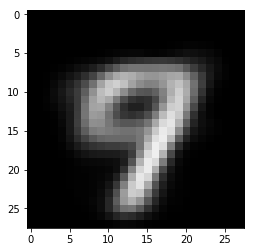

Centroid 1 / 10 is
   7  with a prob. of 39 %
   9  with a prob. of 27 %
   4  with a prob. of 26 %



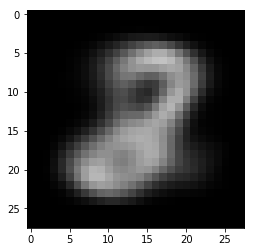

Centroid 2 / 10 is
   2  with a prob. of 51 %
   8  with a prob. of 29 %
   3  with a prob. of 11 %



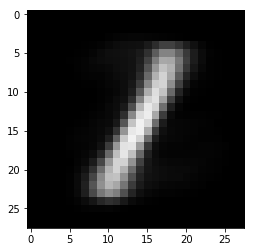

Centroid 3 / 10 is
   1  with a prob. of 75 %
   2  with a prob. of 10 %
   8  with a prob. of 5 %



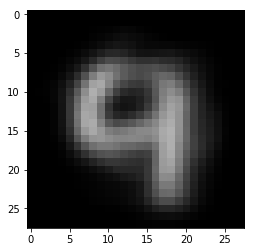

Centroid 4 / 10 is
   4  with a prob. of 37 %
   9  with a prob. of 24 %
   6  with a prob. of 13 %



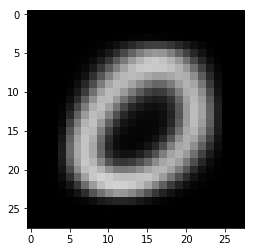

Centroid 5 / 10 is
   0  with a prob. of 94 %
   6  with a prob. of 1 %
   5  with a prob. of 1 %



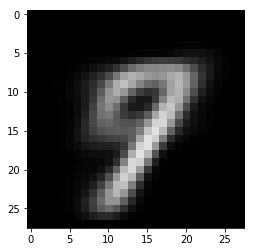

Centroid 6 / 10 is
   7  with a prob. of 41 %
   9  with a prob. of 26 %
   4  with a prob. of 23 %



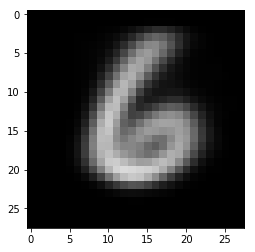

Centroid 7 / 10 is
   6  with a prob. of 83 %
   0  with a prob. of 5 %
   2  with a prob. of 4 %



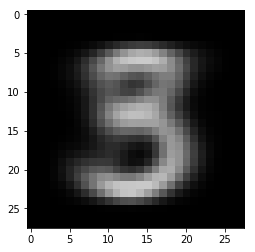

Centroid 8 / 10 is
   3  with a prob. of 49 %
   5  with a prob. of 23 %
   8  with a prob. of 18 %



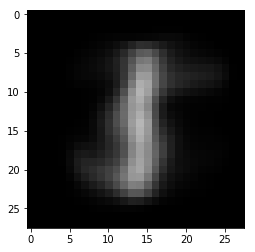

Centroid 9 / 10 is
   1  with a prob. of 40 %
   5  with a prob. of 22 %
   6  with a prob. of 9 %



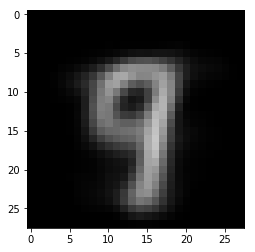

Centroid 10 / 10 is
   9  with a prob. of 29 %
   7  with a prob. of 25 %
   4  with a prob. of 21 %

--- --- --- ---


In [6]:
if True:
    test_bundle(bundle10, A_images, A_labels)

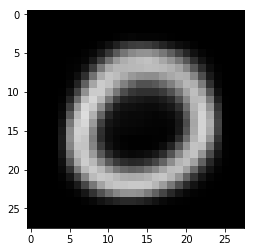

Centroid 1 / 20 is
   0  with a prob. of 96 %
   5  with a prob. of 1 %
   6  with a prob. of 1 %



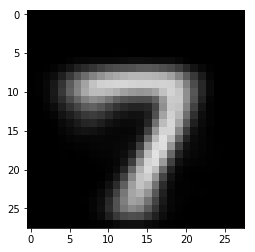

Centroid 2 / 20 is
   7  with a prob. of 93 %
   9  with a prob. of 4 %
   2  with a prob. of 1 %



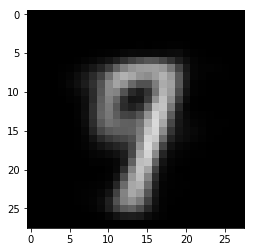

Centroid 3 / 20 is
   9  with a prob. of 36 %
   7  with a prob. of 34 %
   4  with a prob. of 16 %



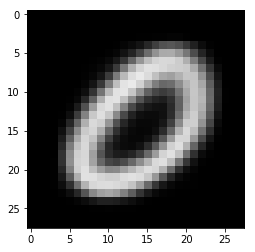

Centroid 4 / 20 is
   0  with a prob. of 95 %
   6  with a prob. of 1 %
   2  with a prob. of 1 %



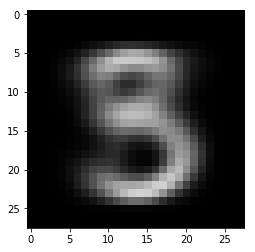

Centroid 5 / 20 is
   3  with a prob. of 47 %
   5  with a prob. of 25 %
   8  with a prob. of 22 %



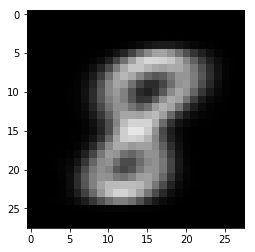

Centroid 6 / 20 is
   8  with a prob. of 81 %
   5  with a prob. of 8 %
   3  with a prob. of 6 %



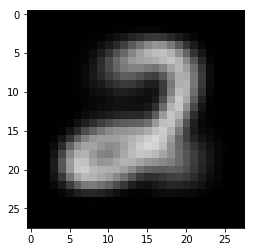

Centroid 7 / 20 is
   2  with a prob. of 92 %
   3  with a prob. of 3 %
   8  with a prob. of 1 %



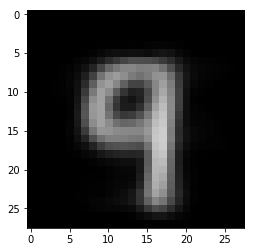

Centroid 8 / 20 is
   9  with a prob. of 40 %
   4  with a prob. of 34 %
   7  with a prob. of 9 %



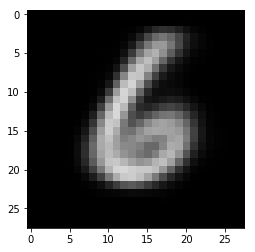

Centroid 9 / 20 is
   6  with a prob. of 89 %
   0  with a prob. of 3 %
   5  with a prob. of 2 %



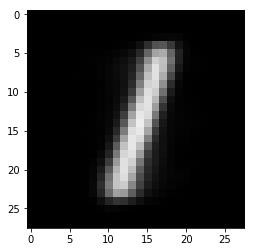

Centroid 10 / 20 is
   1  with a prob. of 78 %
   2  with a prob. of 4 %
   6  with a prob. of 4 %



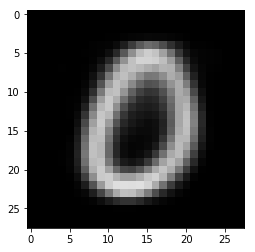

Centroid 11 / 20 is
   0  with a prob. of 83 %
   5  with a prob. of 6 %
   6  with a prob. of 4 %



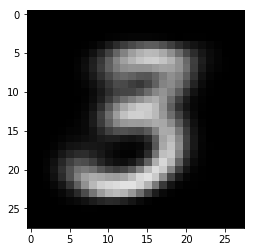

Centroid 12 / 20 is
   3  with a prob. of 71 %
   5  with a prob. of 19 %
   8  with a prob. of 4 %



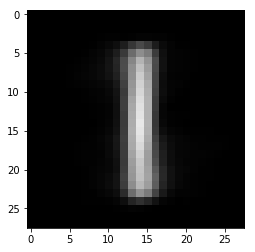

Centroid 13 / 20 is
   1  with a prob. of 78 %
   3  with a prob. of 5 %
   2  with a prob. of 4 %



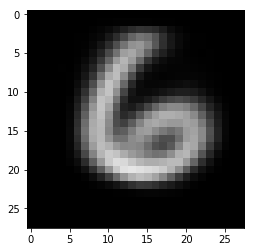

Centroid 14 / 20 is
   6  with a prob. of 93 %
   4  with a prob. of 1 %
   5  with a prob. of 1 %



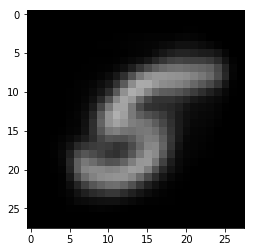

Centroid 15 / 20 is
   5  with a prob. of 63 %
   8  with a prob. of 9 %
   6  with a prob. of 5 %



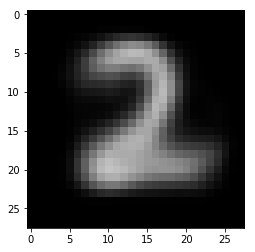

Centroid 16 / 20 is
   2  with a prob. of 92 %
   3  with a prob. of 1 %
   6  with a prob. of 1 %



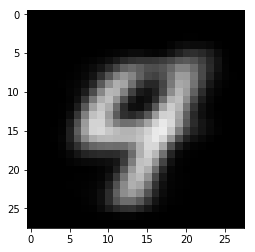

Centroid 17 / 20 is
   4  with a prob. of 67 %
   9  with a prob. of 26 %
   7  with a prob. of 2 %



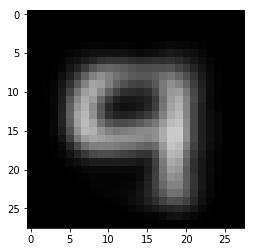

Centroid 18 / 20 is
   4  with a prob. of 45 %
   9  with a prob. of 29 %
   7  with a prob. of 11 %



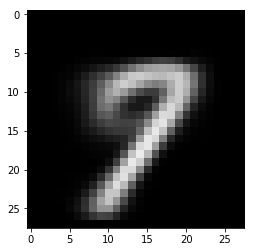

Centroid 19 / 20 is
   7  with a prob. of 60 %
   9  with a prob. of 31 %
   4  with a prob. of 5 %



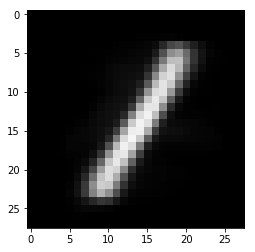

Centroid 20 / 20 is
   1  with a prob. of 80 %
   7  with a prob. of 5 %
   4  with a prob. of 5 %

--- --- --- ---


In [7]:
if True:
    test_bundle(bundle20, A_images, A_labels)

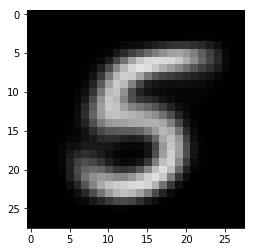

Centroid 1 / 30 is
   5  with a prob. of 88 %
   6  with a prob. of 4 %
   8  with a prob. of 3 %



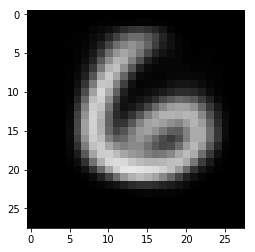

Centroid 2 / 30 is
   6  with a prob. of 93 %
   0  with a prob. of 2 %
   4  with a prob. of 1 %



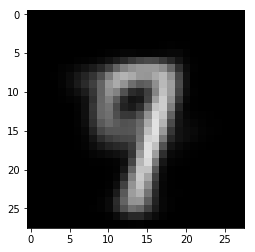

Centroid 3 / 30 is
   7  with a prob. of 41 %
   9  with a prob. of 37 %
   4  with a prob. of 16 %



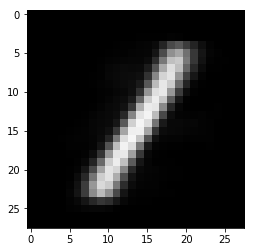

Centroid 4 / 30 is
   1  with a prob. of 85 %
   7  with a prob. of 5 %
   4  with a prob. of 3 %



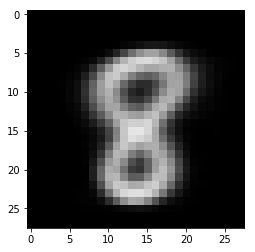

Centroid 5 / 30 is
   8  with a prob. of 88 %
   5  with a prob. of 3 %
   3  with a prob. of 3 %



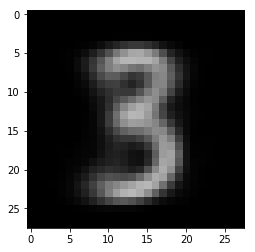

Centroid 6 / 30 is
   3  with a prob. of 59 %
   8  with a prob. of 19 %
   5  with a prob. of 9 %



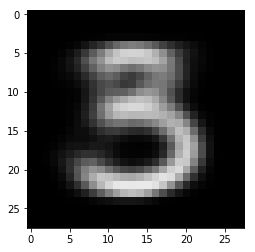

Centroid 7 / 30 is
   3  with a prob. of 63 %
   5  with a prob. of 27 %
   8  with a prob. of 5 %



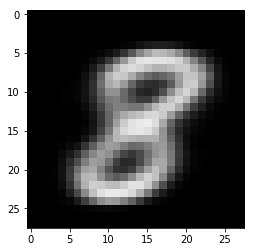

Centroid 8 / 30 is
   8  with a prob. of 71 %
   3  with a prob. of 22 %
   2  with a prob. of 4 %



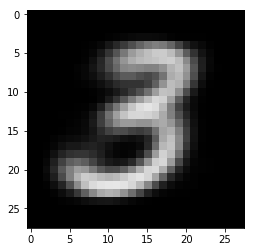

Centroid 9 / 30 is
   3  with a prob. of 85 %
   5  with a prob. of 5 %
   2  with a prob. of 3 %



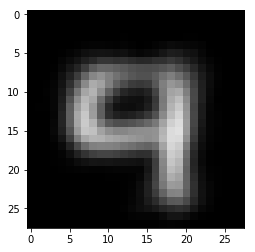

Centroid 10 / 30 is
   4  with a prob. of 53 %
   9  with a prob. of 34 %
   7  with a prob. of 10 %



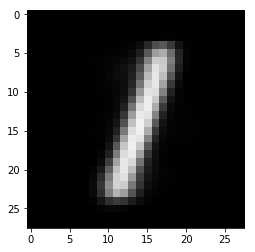

Centroid 11 / 30 is
   1  with a prob. of 85 %
   7  with a prob. of 4 %
   2  with a prob. of 3 %



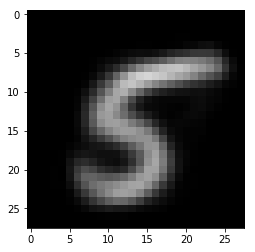

Centroid 12 / 30 is
   5  with a prob. of 89 %
   8  with a prob. of 4 %
   0  with a prob. of 3 %



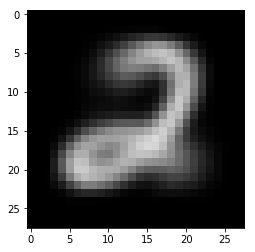

Centroid 13 / 30 is
   2  with a prob. of 95 %
   3  with a prob. of 1 %
   0  with a prob. of 1 %



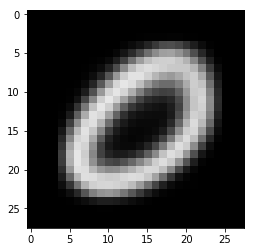

Centroid 14 / 30 is
   0  with a prob. of 95 %
   6  with a prob. of 1 %
   2  with a prob. of 1 %



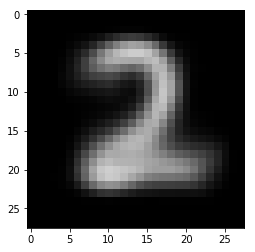

Centroid 15 / 30 is
   2  with a prob. of 96 %
   3  with a prob. of 1 %
   1  with a prob. of 1 %



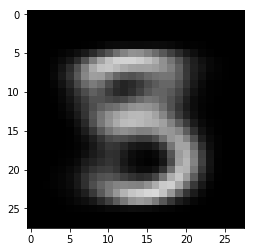

Centroid 16 / 30 is
   3  with a prob. of 45 %
   8  with a prob. of 25 %
   5  with a prob. of 23 %



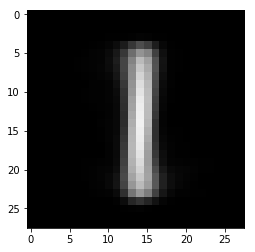

Centroid 17 / 30 is
   1  with a prob. of 89 %
   2  with a prob. of 3 %
   3  with a prob. of 1 %



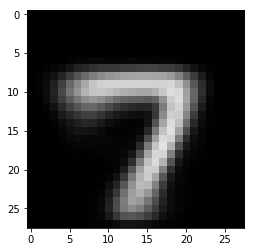

Centroid 18 / 30 is
   7  with a prob. of 95 %
   9  with a prob. of 2 %
   2  with a prob. of 0 %



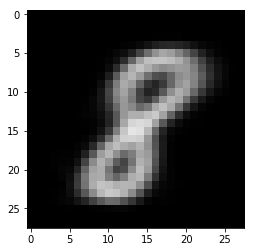

Centroid 19 / 30 is
   8  with a prob. of 88 %
   3  with a prob. of 6 %
   2  with a prob. of 2 %



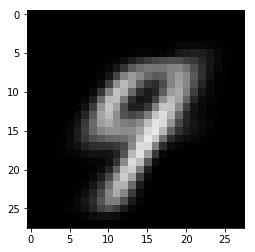

Centroid 20 / 30 is
   4  with a prob. of 44 %
   9  with a prob. of 42 %
   7  with a prob. of 10 %



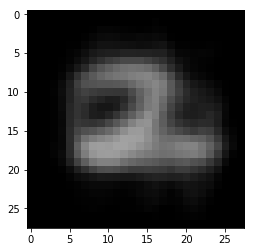

Centroid 21 / 30 is
   2  with a prob. of 57 %
   6  with a prob. of 9 %
   4  with a prob. of 6 %



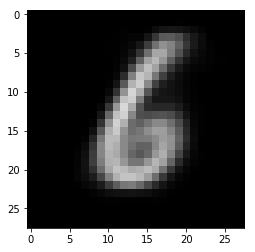

Centroid 22 / 30 is
   6  with a prob. of 78 %
   0  with a prob. of 7 %
   4  with a prob. of 3 %



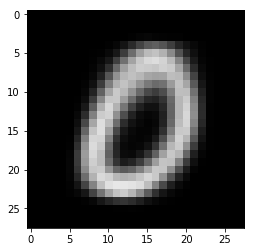

Centroid 23 / 30 is
   0  with a prob. of 96 %
   2  with a prob. of 1 %
   6  with a prob. of 0 %



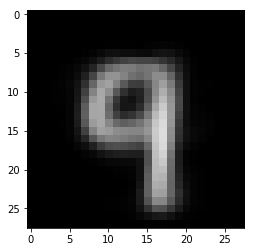

Centroid 24 / 30 is
   9  with a prob. of 43 %
   4  with a prob. of 40 %
   7  with a prob. of 11 %



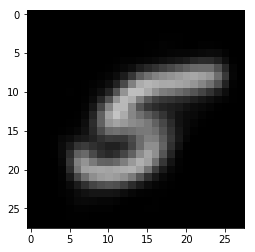

Centroid 25 / 30 is
   5  with a prob. of 81 %
   8  with a prob. of 6 %
   3  with a prob. of 3 %



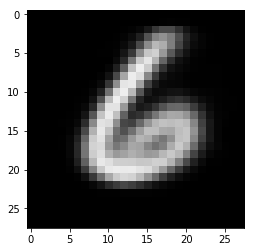

Centroid 26 / 30 is
   6  with a prob. of 94 %
   2  with a prob. of 1 %
   8  with a prob. of 1 %



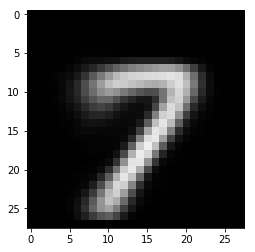

Centroid 27 / 30 is
   7  with a prob. of 93 %
   9  with a prob. of 4 %
   3  with a prob. of 1 %



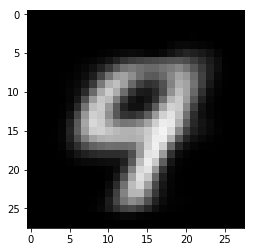

Centroid 28 / 30 is
   4  with a prob. of 55 %
   9  with a prob. of 38 %
   7  with a prob. of 4 %



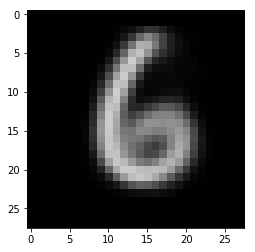

Centroid 29 / 30 is
   6  with a prob. of 86 %
   5  with a prob. of 4 %
   0  with a prob. of 3 %



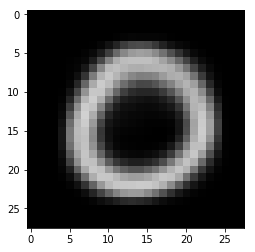

Centroid 30 / 30 is
   0  with a prob. of 96 %
   5  with a prob. of 1 %
   8  with a prob. of 1 %

--- --- --- ---


In [8]:
if True:
    test_bundle(bundle30, A_images, A_labels)

In [9]:
# Plot number of iterations and total loss (error) at each point
#plt.plot(range(0, len(losses)), losses)


In [10]:
#test(bundles[0], the_images, the_labels)

In [11]:
#test(the_images, the_labels, 20)

In [12]:
#test(the_images, the_labels, 30)

In [13]:
bundle_1_paths = glob.glob('_ignore/bundle-*.npy')
print(bundle_1_paths)

['_ignore/bundle-17-03-07-224346.157547.npy', '_ignore/bundle-17-03-07-224408.291734.npy', '_ignore/bundle-17-03-07-225037.329796.npy', '_ignore/bundle-17-03-07-225420.328041.npy', '_ignore/bundle-17-03-07-225603.055124.npy', '_ignore/bundle-17-03-07-225757.550654.npy', '_ignore/bundle-17-03-07-225932.831559.npy', '_ignore/bundle-17-03-07-230757.999216.npy', '_ignore/bundle-17-03-07-231720.215287.npy', '_ignore/bundle-17-03-07-233605.036488.npy']


In [14]:
best_bundle = get_best_bundle(bundle_1_paths, "0", do_filter=True)




## Búa til gögn

Skoða skránna `generate_data.ipynb`.